# Bike Sharing Demand

Data Fields:
date - hourly date 

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weekday- Weekday number 0-sunday etc.

weather -
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

demand - number of total rentals (Dependent Variable)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Data Exploration

In [2]:
df=pd.read_csv(r'C:\Users\VGopalak\Downloads\original.csv')

In [3]:
df.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  demand      17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Types of variables:

Categorical - Season, Holiday, Working day, Weather
Timeseries - Datetime
Numerical - Temp, aTemp, Humidity, Windspeed, Casual, Registered, Count

In [6]:
df.describe()

,index,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
df.dtypes

index           int64
date           object
season          int64
year            int64
month           int64
hour            int64
holiday         int64
weekday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
demand          int64
dtype: object

# Missing Value Analysis

In [7]:
df.isnull().sum()

index         0
date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
demand        0
dtype: int64

There isn't any missing values

# Feature Engineering

Steps:

changing the datatype of "month","hour","weekday","season","holiday","workingday" and "weather" to category.

Drop the date,index column as we already have necessary details from other columns

In [12]:
#changing to category datatype
col_cat = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in col_cat:
    df[var] = df[var].astype("category")

In [14]:
df.dtypes

index            int64
date            object
season        category
year             int64
month         category
hour          category
holiday       category
weekday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
demand           int64
dtype: object

Dropping unncessary Columns

In [15]:
df  = df.drop(["index","date"],axis=1)

# Exploratory Data Analysis

# Visualise the continuous features Vs demand

Temperature vs Demand

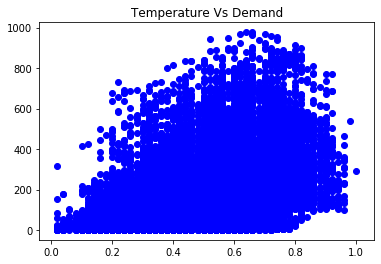

In [25]:
#plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(df['temp'], df['demand'], c='b')

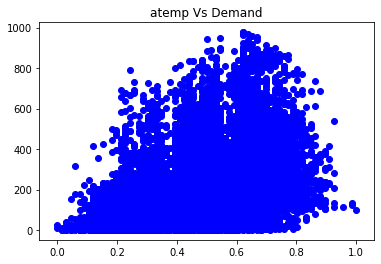

In [26]:
plt.title('atemp Vs Demand')
plt.scatter(df['atemp'], df['demand'], c='b')

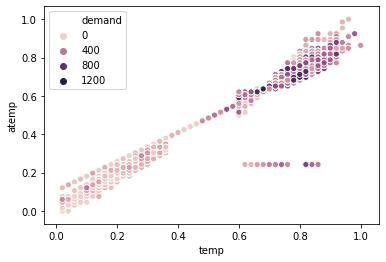

In [20]:
sns.scatterplot(x="temp", y="atemp", data=df, hue="demand")
plt.show()

As the temperature increases number of rides will also get increased.

Humidity vs demand

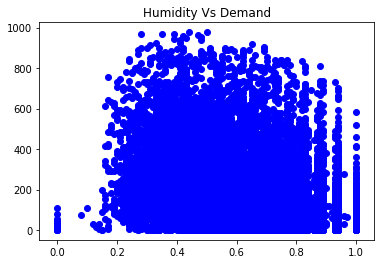

In [28]:
plt.title('Humidity Vs Demand')
plt.scatter(df['humidity'], df['demand'], c='b')

Very little change in demand for change or increase in humidity.

Windspeed vs demand

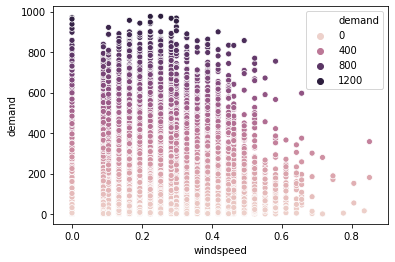

In [30]:
sns.scatterplot(x="windspeed", y="demand", data=df, hue="demand")
plt.show()

The wind speed plot also shows a pattern that as the wind speed increases up to the particular point,it does not show any variation but beyond a point the demand for rentals go down significantly.

# Visualise the Categorical features Vs demand

Demand vs Season

<BarContainer object of 4 artists>

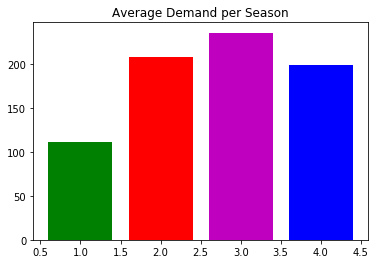

In [36]:
colors = ['g', 'r', 'm', 'b']
plt.title('Average Demand per Season')
cat_list = df['season'].unique()
cat_average = df.groupby('season').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

Demand varies depending upon the season.It's the highest during the fall while lowest during the spring which is Season 1

Month vs Demand

<BarContainer object of 12 artists>

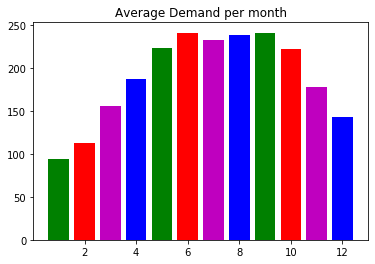

In [33]:
colors = ['g', 'r', 'm', 'b']
plt.title('Average Demand per month')
cat_list = df['month'].unique()
cat_average = df.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

The months which fall during the summer shows higher demand.

Holiday vs Demand

<BarContainer object of 2 artists>

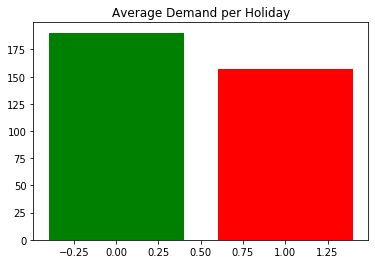

In [34]:
plt.title('Average Demand per Holiday')
cat_list = df['holiday'].unique()
cat_average = df.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

Weekday vs Demand

<BarContainer object of 7 artists>

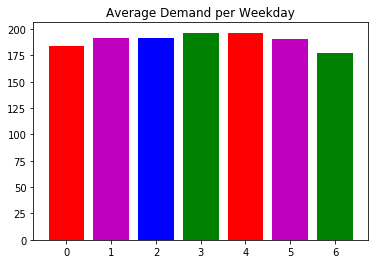

In [40]:
plt.title('Average Demand per Weekday')
cat_list = df['weekday'].unique()
cat_average = df.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

It  does not matter which day of the week it is,there is hardly any change in demand

This is not so important and we will be better if we drop this feature.

Year vs Demand

<BarContainer object of 2 artists>

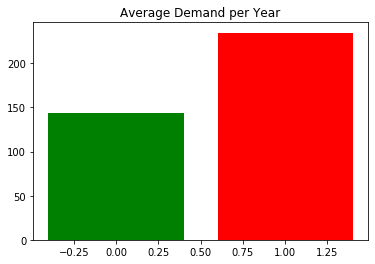

In [41]:
plt.title('Average Demand per Year')
cat_list = df['year'].unique()
cat_average = df.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

We have only two years of data and we will not know for sure how it will be for 5 or 6 years. So it's better we drop this feature too.

Hour vs Demand

<BarContainer object of 24 artists>

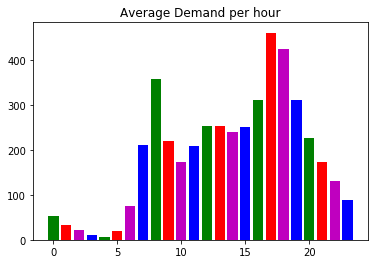

In [42]:
plt.title('Average Demand per hour')
cat_list = df['hour'].unique()
cat_average = df.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

you can see that demand is very low during the early morning or past midnight and it picks up during the certain hours

Demand vs Working day

<BarContainer object of 2 artists>

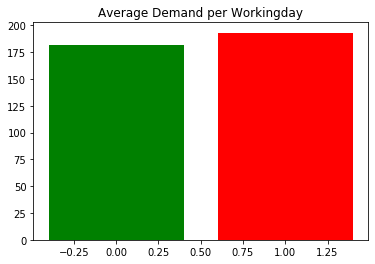

In [43]:
plt.title('Average Demand per Workingday')
cat_list = df['workingday'].unique()
cat_average = df.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

We can see there is no much change whether it is working day or not.So People use the bikes to travel to nearby workplaces during the weekdays and could possibly be using it for exercise and fun during the weekends.

It's better we drop this feature

Demand vs Weather

<BarContainer object of 4 artists>

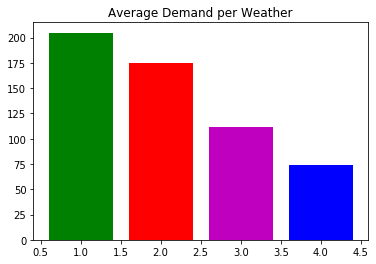

In [44]:
plt.title('Average Demand per Weather')
cat_list = df['weather'].unique()
cat_average = df.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

During rainy days the demand is very low and when the cloud is clear the demand is very high

# Analyzing Target Variable

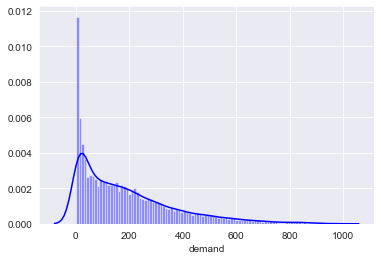

In [52]:
sns.set_style('darkgrid')
sns.distplot(df['demand'], bins = 100, color = 'blue')

Our target variable is right-skewed.

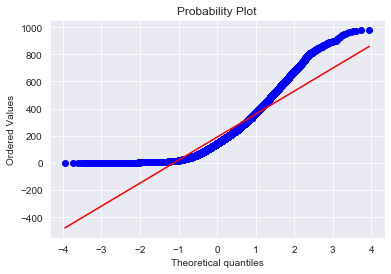

In [47]:
#Q-Q Plot
from scipy import stats
plt = stats.probplot(df['demand'], plot=sns.mpl.pyplot)

Our target variable is not normally distributed.

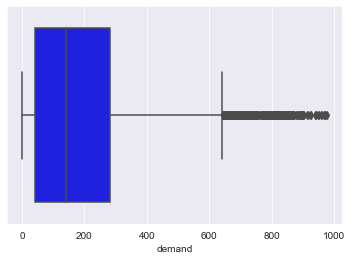

In [50]:
sns.boxplot(x = 'demand', data = df, color = 'blue')

There are multiple outliers in the variable.

# Outlier Analysis

In [54]:
#Calculating the number of outliers
Q1 = df['demand'].quantile(0.25)
Q3 = df['demand'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['demand'] < (Q1 - 1.5 * IQR)) | (df['demand'] > (Q3 + 1.5 * IQR))]
print((len(outliers)/len(df))*100)

2.905805857644283


2.90% of the target values are above Q3 + 1.5IQR.

Let's remove the outliers

In [56]:
df_final = df[np.abs(df["demand"]-df["demand"].mean())<=(3*df["demand"].std())]
print ("Shape Of The Before Ouliers: ",df.shape)
print ("Shape Of The After Ouliers: ",df_final.shape)

Shape Of The Before Ouliers:  (17379, 15)
Shape Of The After Ouliers:  (17135, 15)


# Testing Assumptions of Multiple Linear Regression

Collinearity and Multi-Collinearity Check

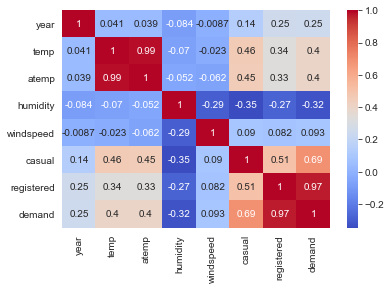

In [61]:
tc = df.corr()
sns.heatmap(tc, annot = True, cmap = 'coolwarm')

Demand is derived from Casual and Registered so it is highly correlated with these two features.We'll have to omit these variables. Temp and atemp are highly correlated. So we can remove any one of the variable.

Dropping Irrelevant features

In [69]:
df_final = df_final.drop(['weekday', 'year', 'workingday', 'atemp','casual', 'registered'], axis=1)

# Autocorrelation test

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.4562056 , 0.4650372 , 0.48822895, 0.49627763, 0.48099652,
        0.4910139 , 0.53918964, 0.60494304, 0.6675045 , 0.72877467,
        0.81373984, 0.9271508 , 1.        , 0.9271508 , 0.81373984,
        0.72877467, 0.6675045 , 0.60494304, 0.53918964, 0.4910139 ,
        0.48099652, 0.49627763, 0.48822895, 0.4650372 , 0.4562056 ],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x255ae27ff08>)

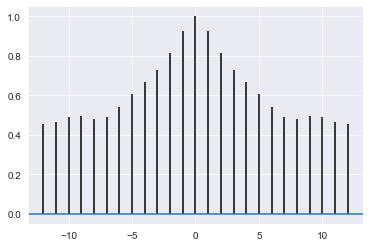

In [70]:
import matplotlib.pyplot as plt
# Autocorrelation of demand using acor
dff1 = pd.to_numeric(df_final['demand'], downcast='float')
plt.acorr(dff1, maxlags=12)

There is high auto-correlation of target variable

# Normality Check

((array([-3.94171042, -3.72363151, -3.60421718, ...,  3.60421718,
          3.72363151,  3.94171042]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.5971457 ,
         6.59850903])),
 (1.3490324630370498, 4.544366339498316, 0.9601811537292402))

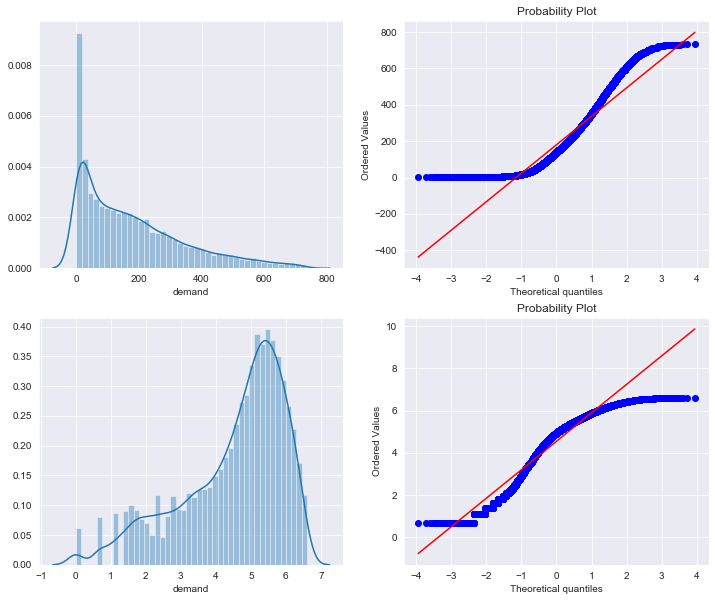

In [72]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sns.distplot(df_final["demand"],ax=axes[0][0])
stats.probplot(df_final["demand"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(df_final["demand"]),ax=axes[1][0])
stats.probplot(np.log1p(df_final["demand"]), dist='norm', fit=True, plot=axes[1][1])

In [79]:
df_final['demand'] = np.log(df_final['demand'])

# Solving the problem of autocorrelation

In [80]:
# Solve the problem of Autocorrelation
# Shift the demand by 3 lags

t_1 = df_final['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = df_final['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = df_final['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

df_final_lag = pd.concat([df_final, t_1, t_2, t_3], axis=1)

In [82]:
df_final_lag.head()

,season,month,hour,holiday,weather,temp,humidity,windspeed,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,0.0,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,0.0,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,0.0,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,0.0,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.0,0.000000,2.564949,3.465736,3.688879


In [84]:
df_final_lag = df_final_lag.dropna()

Now we have same dataset with additinal three lag value columns.

In [87]:
df.columns

Index(['season', 'month', 'hour', 'holiday', 'weather', 'temp', 'humidity',
       'windspeed', 'demand'],
      dtype='object')

Let's Analyze windspeed column

In [88]:
df_final_lag['windspeed'].value_counts()

0.0000    2152
0.1343    1720
0.1642    1664
0.1940    1635
0.1045    1602
0.2239    1482
0.0896    1413
0.2537    1268
0.2836    1029
0.2985     797
0.3284     591
0.3582     457
0.3881     374
0.4179     292
0.4478     173
0.4627     145
0.4925     111
0.5224      82
0.5821      43
0.5522      39
0.6119      23
0.6418      14
0.6567      11
0.6866       5
0.8507       2
0.8060       2
0.7463       2
0.7164       2
0.7761       1
0.8358       1
Name: windspeed, dtype: int64

As you can see winspeed has many 0 values. 

Now i am filling windspeed's 0 value using random forest.

Random Forest is ensemble method gives better prediction compared to other models.

In [93]:
from sklearn.ensemble import RandomForestRegressor
df_Wind_0 = df_final_lag[df_final_lag["windspeed"]==0]
df_Wind_Not0 = df_final_lag[df_final_lag["windspeed"]!=0]
Columns = ["season","weather","humidity","month","temp"]
rf_model = RandomForestRegressor()
rf_model.fit(df_Wind_Not0[Columns],df_Wind_Not0["windspeed"])

wind0Values = rf_model.predict(X= df_Wind_0[Columns])
df_Wind_0["windspeed"] = wind0Values
data = df_Wind_Not0.append(df_Wind_0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

In [96]:
data.dtypes

season       category
month        category
hour         category
holiday      category
weather      category
temp          float64
humidity      float64
windspeed     float64
demand        float64
t-1           float64
t-2           float64
t-3           float64
dtype: object

# Dummy Variables

Create Dummy Variables and drop first to avoid dummy variables trap

Here we are not maintaining any order hence we can go with one-hot encoding

In [97]:
data = pd.get_dummies(data, drop_first=True)

In [99]:
data.columns

Index(['temp', 'humidity', 'windspeed', 'demand', 't-1', 't-2', 't-3',
       'season_2', 'season_3', 'season_4', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'holiday_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [105]:
data.shape

(17132, 48)

We successfully completed data processing stage .Next we go ahed and build models.

# Model Building With Evaluation

Splitting X and Y

In [102]:
X = np.array(data.loc[:,data.columns!='demand'])
Y = np.array(data.loc[:,data.columns=='demand'])

In [106]:
print(X.shape)
print(Y.shape)

(17132, 47)
(17132, 1)


Random Search

In [107]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics

Model Function

In [108]:
def regression(X, Y, reg, param_grid, test_size=0.20):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
      
    
    reg = RandomizedSearchCV(reg,parameters, cv = 10,refit = True)
    reg.fit(X_train, Y_train)     

    return X_train, X_test, Y_train, Y_test, reg

Evaluation Function

In [109]:
def evaluation_metrics(X_train, X_test, Y_train, Y_test, reg):
    Y_pred_train = reg.best_estimator_.predict(X_train)
    Y_pred_test = reg.best_estimator_.predict(X_test)
    
    print("Best Parameters:",reg.best_params_)
    print('\n')
    print("Mean cross-validated score of the best_estimator : ", reg.best_score_) 
    print('\n')
    MAE_train = metrics.mean_absolute_error(Y_train, Y_pred_train)
    MAE_test = metrics.mean_absolute_error(Y_test, Y_pred_test)
    print('MAE for training set is {}'.format(MAE_train))
    print('MAE for test set is {}'.format(MAE_test))
    print('\n')
    MSE_train = metrics.mean_squared_error(Y_train, Y_pred_train)
    MSE_test = metrics.mean_squared_error(Y_test, Y_pred_test)
    print('MSE for training set is {}'.format(MSE_train))
    print('MSE for test set is {}'.format(MSE_test))
    print('\n')
    RMSE_train = np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
    print('\n')
    r2_train = metrics.r2_score(Y_train, Y_pred_train)
    r2_test = metrics.r2_score(Y_test, Y_pred_test)
    print("R2 value for train: ", r2_train)
    print("R2 value for test: ", r2_test)

# Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
reg = LinearRegression()
parameters = {'fit_intercept':[True,False],'normalize':[True,False], 'copy_X':[True, False]}
X_train, X_test, Y_train, Y_test, linreg = regression(X, Y, reg, param_grid=parameters, test_size=0.20)
evaluation_metrics(X_train, X_test, Y_train, Y_test, reg = linreg)

Best Parameters: {'normalize': True, 'fit_intercept': True, 'copy_X': True}


Mean cross-validated score of the best_estimator :  0.9225646355251985


MAE for training set is 0.2811914919604396
MAE for test set is 0.2844996876914439


MSE for training set is 0.16586784637649413
MSE for test set is 0.1642203206439077


RMSE for training set is 0.40726876430251086
RMSE for test set is 0.4052410648538814


R2 value for train:  0.9232779552266045
R2 value for test:  0.9257552694313229


# Decision Tree Regressor

In [112]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
reg = DecisionTreeRegressor()
parameters = {'max_depth':[5,6,7,8,9,10]}
X_train, X_test, Y_train, Y_test, DTreg = regression(X, Y, reg, param_grid=parameters, test_size=0.20)
evaluation_metrics(X_train, X_test, Y_train, Y_test, reg = DTreg)

Best Parameters: {'max_depth': 8}


Mean cross-validated score of the best_estimator :  0.9179597334414223


MAE for training set is 0.2607438820929943
MAE for test set is 0.2989110608556729


MSE for training set is 0.1394458203086003
MSE for test set is 0.18776379775288582


RMSE for training set is 0.37342445060359974
RMSE for test set is 0.4333172022351361


R2 value for train:  0.9354994430632734
R2 value for test:  0.9151111596905059


# Random Forest Regressor

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
reg = RandomForestRegressor(n_jobs=-1)
parameters = {'n_estimators':[10,15,20,25],'max_depth':[5,6,7,8,9,10]}
X_train, X_test, Y_train, Y_test, RFreg = regression(X, Y, reg, param_grid=parameters, test_size=0.20)
evaluation_metrics(X_train, X_test, Y_train, Y_test, reg = RFreg)

Best Parameters: {'n_estimators': 20, 'max_depth': 10}


Mean cross-validated score of the best_estimator :  0.9383428674075743


MAE for training set is 0.19826251198998993
MAE for test set is 0.2489485146075883


MSE for training set is 0.08414918388617537
MSE for test set is 0.14179130373978666


RMSE for training set is 0.2900847874090873
RMSE for test set is 0.3765518606245183


R2 value for train:  0.9610768597121259
R2 value for test:  0.9358955268028674


# Gradient Boosting Regressor


In [117]:
from sklearn.ensemble import GradientBoostingRegressor

In [121]:
reg = GradientBoostingRegressor()
parameters = {'alpha':[0.01,0.001,0.0001],'n_estimators':[100,150,200],'max_depth':[3,5,7]}
X_train, X_test, Y_train, Y_test, XGreg = regression(X, Y, reg, param_grid=parameters, test_size=0.20)
evaluation_metrics(X_train, X_test, Y_train, Y_test, reg = XGreg)

Best Parameters: {'n_estimators': 100, 'max_depth': 7, 'alpha': 0.01}


Mean cross-validated score of the best_estimator :  0.9443230610651525


MAE for training set is 0.16721966295477592
MAE for test set is 0.2316786937704008


MSE for training set is 0.058148380402151506
MSE for test set is 0.12778621192879144


RMSE for training set is 0.2411397528450079
RMSE for test set is 0.3574719736270124


R2 value for train:  0.9731035113665856
R2 value for test:  0.942227290521388


# Support Vector Regressor


In [119]:
from sklearn.svm import SVR

In [120]:
reg = SVR()
parameters = {'max_iter':[1000,5000,10000]}
X_train, X_test, Y_train, Y_test, SVRreg = regression(X, Y, reg, param_grid=parameters, test_size=0.20)
evaluation_metrics(X_train, X_test, Y_train, Y_test, reg = SVRreg)

Best Parameters: {'max_iter': 10000}


Mean cross-validated score of the best_estimator :  0.9387520644082423


MAE for training set is 0.23839085136888777
MAE for test set is 0.2472199661440719


MSE for training set is 0.12856623645534612
MSE for test set is 0.13662014292349017


RMSE for training set is 0.35856134266725703
RMSE for test set is 0.36962162128789244


R2 value for train:  0.9405317862071677
R2 value for test:  0.9382334313936502


# Multi Layer Perceptron Regressor


In [122]:
from sklearn.neural_network import MLPRegressor

In [123]:
reg = MLPRegressor(activation='tanh',early_stopping=True)
parameters = {'solver':['sgd', 'adam'],'learning_rate_init':[0.01,0.001,0.0001],'hidden_layer_sizes':[10,25,50],'max_iter':[500,1000]}
X_train, X_test, Y_train, Y_test, MLPreg = regression(X, Y, reg, param_grid=parameters, test_size=0.20)
evaluation_metrics(X_train, X_test, Y_train, Y_test, reg = MLPreg)

Best Parameters: {'solver': 'adam', 'max_iter': 1000, 'learning_rate_init': 0.01, 'hidden_layer_sizes': 25}


Mean cross-validated score of the best_estimator :  0.9458731531050846


MAE for training set is 0.2159088468341798
MAE for test set is 0.2362208454743048


MSE for training set is 0.09977251943674498
MSE for test set is 0.12133445606458579


RMSE for training set is 0.31586788288261436
RMSE for test set is 0.34833095766036326


R2 value for train:  0.9538502978690316
R2 value for test:  0.9451441577760288


# Conclusion

Multi Layer Perceptron Regressor perfoms well compared to other models. 

# Best Estimator

In [124]:
MLPreg.best_estimator_

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=25, learning_rate='constant',
             learning_rate_init=0.01, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

# Actual Vs Predicted

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [126]:
Y_Pred_test = MLPreg.best_estimator_.predict(X_test)

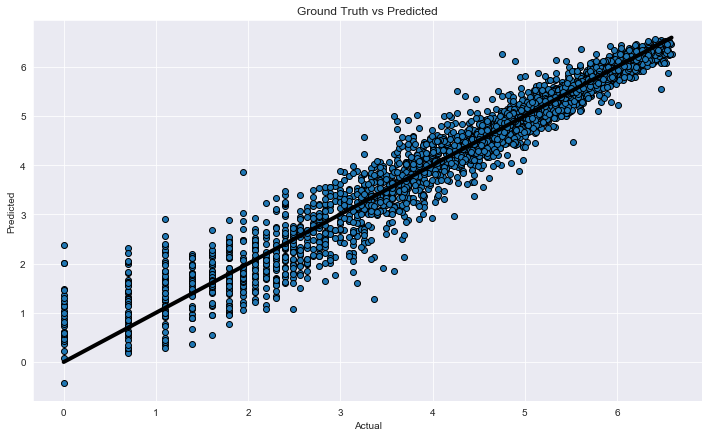

In [127]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(Y_test, Y_Pred_test, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k-', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

As we can see there is a good relationship between actual and predicted Values

# END 